In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import BayesianRidge, Lasso, LinearRegression, Ridge, RidgeCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')


In [2]:
file_path = "M1_final.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [12]:
def rmse(y_true, y_pred):
    return round(mean_squared_error(y_true, y_pred) ** 0.5, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8825 entries, 0 to 8824
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              8825 non-null   int64  
 1   DAY_OF_MONTH       8825 non-null   int64  
 2   DAY_OF_WEEK        8825 non-null   int64  
 3   OP_UNIQUE_CARRIER  8825 non-null   object 
 4   TAIL_NUM           8825 non-null   object 
 5   DEST               8825 non-null   object 
 6   DEP_DELAY          8825 non-null   int64  
 7   CRS_ELAPSED_TIME   8825 non-null   int64  
 8   DISTANCE           8825 non-null   int64  
 9   CRS_DEP_M          8825 non-null   int64  
 10  DEP_TIME_M         8825 non-null   int64  
 11  CRS_ARR_M          8825 non-null   int64  
 12  Temperature        8825 non-null   int64  
 13  Dew Point          8825 non-null   object 
 14  Humidity           8825 non-null   int64  
 15  Wind               8825 non-null   object 
 16  Wind Speed         8825 

In [6]:
df.dropna(inplace=True)
df["Dew Point"] = df["Dew Point"].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8825 entries, 0 to 8824
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              8825 non-null   int64  
 1   DAY_OF_MONTH       8825 non-null   int64  
 2   DAY_OF_WEEK        8825 non-null   int64  
 3   OP_UNIQUE_CARRIER  8825 non-null   object 
 4   TAIL_NUM           8825 non-null   object 
 5   DEST               8825 non-null   object 
 6   DEP_DELAY          8825 non-null   int64  
 7   CRS_ELAPSED_TIME   8825 non-null   int64  
 8   DISTANCE           8825 non-null   int64  
 9   CRS_DEP_M          8825 non-null   int64  
 10  DEP_TIME_M         8825 non-null   int64  
 11  CRS_ARR_M          8825 non-null   int64  
 12  Temperature        8825 non-null   int64  
 13  Dew Point          8825 non-null   int64  
 14  Humidity           8825 non-null   int64  
 15  Wind               8825 non-null   object 
 16  Wind Speed         8825 

In [7]:
le = LabelEncoder()
df_le = df.copy()
for x in df_le.select_dtypes(["object_"]).columns:
    df_le[x] = le.fit_transform(df_le[x]).astype("str")
df_le

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,985,10,-1,124,636,324,...,34,58,15,25,38,29.86,3,9,17,14
1,11,1,5,3,1467,26,-7,371,2475,340,...,34,58,15,25,38,29.86,3,9,17,15
2,11,1,5,3,1385,19,40,181,1069,301,...,34,58,15,25,38,29.86,3,9,17,22
3,11,1,5,3,1481,28,-2,168,944,345,...,34,58,15,25,38,29.86,3,9,17,12
4,11,1,5,4,1122,1,-4,139,760,360,...,32,58,15,24,35,29.91,3,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8820,11,27,3,0,79,18,-2,137,509,1040,...,50,89,9,17,0,29.60,0,28,27,27
8821,11,27,3,1,17,26,20,384,2475,1020,...,50,89,9,17,0,29.60,0,28,27,27
8822,11,27,3,3,1376,58,-8,379,2521,1052,...,50,89,9,17,0,29.60,0,28,27,16
8823,11,27,3,3,617,49,4,192,1074,1041,...,50,89,9,17,0,29.60,0,28,27,17


In [8]:
X = df_le.drop("TAXI_OUT", axis=1)
Y = df_le["TAXI_OUT"]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [10]:
rmse_le = np.zeros(7, dtype="float64")

In [13]:
linreg = LinearRegression().fit(X_train, Y_train)
Y_pred1 = linreg.predict(X_test)
rmse_le[0] = rmse(Y_test, Y_pred1)
rmse_le[0]

6.4

In [14]:
err_rate = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    err_rate.append(np.mean(Y_pred != Y_test))
k_index = err_rate.index(min(err_rate))
min_err = min(err_rate)
print(f"Minimum error of {min_err} at K = {k_index}.")

Minimum error of 0.9297848244620611 at K = 39.


In [15]:
KNN = KNeighborsRegressor(n_neighbors=31).fit(X_train, Y_train)
Y_pred4 = KNN.predict(X_test)
rmse_le[3] = rmse(Y_test, Y_pred4)
rmse_le[3]

6.41

In [16]:
SVR = SVR().fit(X_train, Y_train)
Y_pred5 = SVR.predict(X_test)
rmse_le[4] = rmse(Y_test, Y_pred5)
rmse_le[4]

6.61

In [17]:
NBreg = BayesianRidge().fit(X_train, Y_train)
Y_pred6 = NBreg.predict(X_test)
rmse_le[5] = rmse(Y_test, Y_pred6)
rmse_le[5]

6.4

In [16]:
df.dtypes

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
TAIL_NUM              object
DEST                  object
DEP_DELAY              int64
CRS_ELAPSED_TIME       int64
DISTANCE               int64
CRS_DEP_M              int64
DEP_TIME_M             int64
CRS_ARR_M              int64
Temperature            int64
Dew Point             object
Humidity               int64
Wind                  object
Wind Speed             int64
Wind Gust              int64
Pressure             float64
Condition             object
sch_dep                int64
sch_arr                int64
TAXI_OUT               int64
dtype: object

In [17]:
df.shape

(8825, 23)

In [19]:
from sklearn.preprocessing import LabelEncoder as LE
df=df.drop("TAIL_NUM",axis=1).copy()
df.sch_dep=LE().fit_transform(df.sch_dep)
df.Condition =LE().fit_transform(df.Condition)
df.Wind =LE().fit_transform(df.Wind.astype(str))
df.DEST=LE().fit_transform(df.DEST)
df.OP_UNIQUE_CARRIER=LE().fit_transform(df.OP_UNIQUE_CARRIER)

<Axes: >

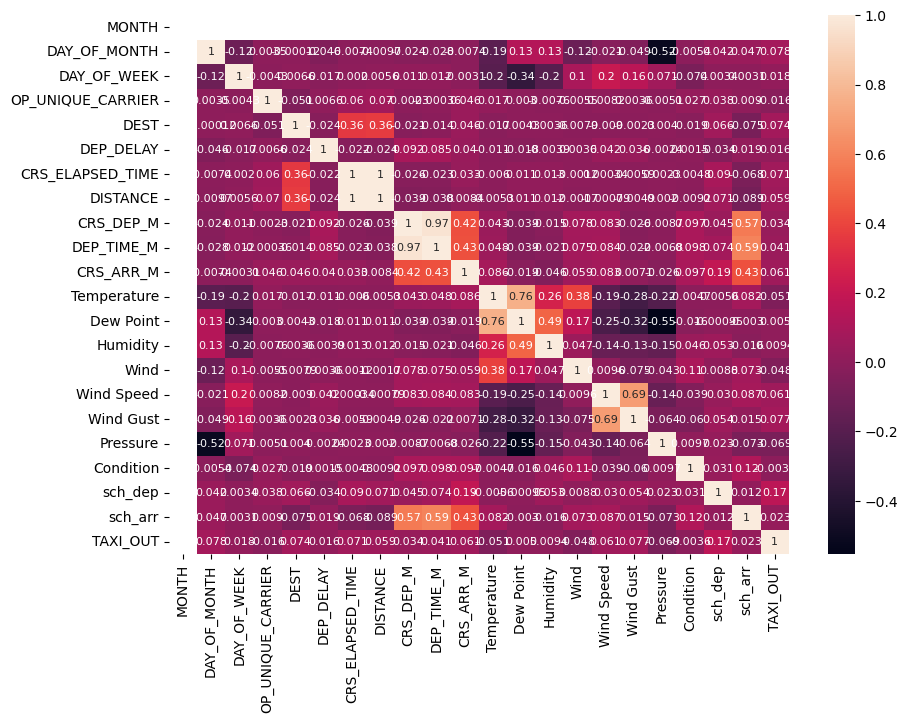

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 8})